In [276]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('axes',titlesize=30)
plt.rc('axes',labelsize=30)
plt.rc('font',size=10)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('legend',fontsize= 15)
pd.set_option('display.max_row', 50000)
plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format='retina'

In [277]:
import folium
import json
from folium import plugins
from folium.features import DivIcon

In [278]:
######## dataset 불러오기
df = pd.read_csv('야놀자!/통합_data/충북통합.csv',sep=',',encoding='cp949')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          637 non-null    object 
 1   score         637 non-null    float64
 2   loc           637 non-null    object 
 3   lowest_price  637 non-null    float64
 4   category      637 non-null    object 
 5   loc2          637 non-null    object 
 6   SIG_CD        637 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 35.0+ KB


In [281]:
print('충북 숙박업소 개수 : ', len(df))
print('충북 숙밥업소 모텔 개수 : ', (df['category']=='m').sum())
print('충북 숙밥업소 호텔 개수 : ', (df['category']=='h').sum())
print('충북 숙밥업소 팬션 개수 : ', (df['category']=='p').sum())
print('충북 숙밥업소 게스트하우스 개수 : ', (df['category']=='g').sum())

충북 숙박업소 개수 :  637
충북 숙밥업소 모텔 개수 :  328
충북 숙밥업소 호텔 개수 :  42
충북 숙밥업소 팬션 개수 :  255
충북 숙밥업소 게스트하우스 개수 :  12


In [282]:
total = len(df)
mtotal = (df['category']=='m').sum()
htotal = (df['category']=='h').sum()
ptotal = (df['category']=='p').sum()
gtotal = (df['category']=='g').sum()

In [283]:
### sort
dfc1 = df.sort_values(by=['category'])

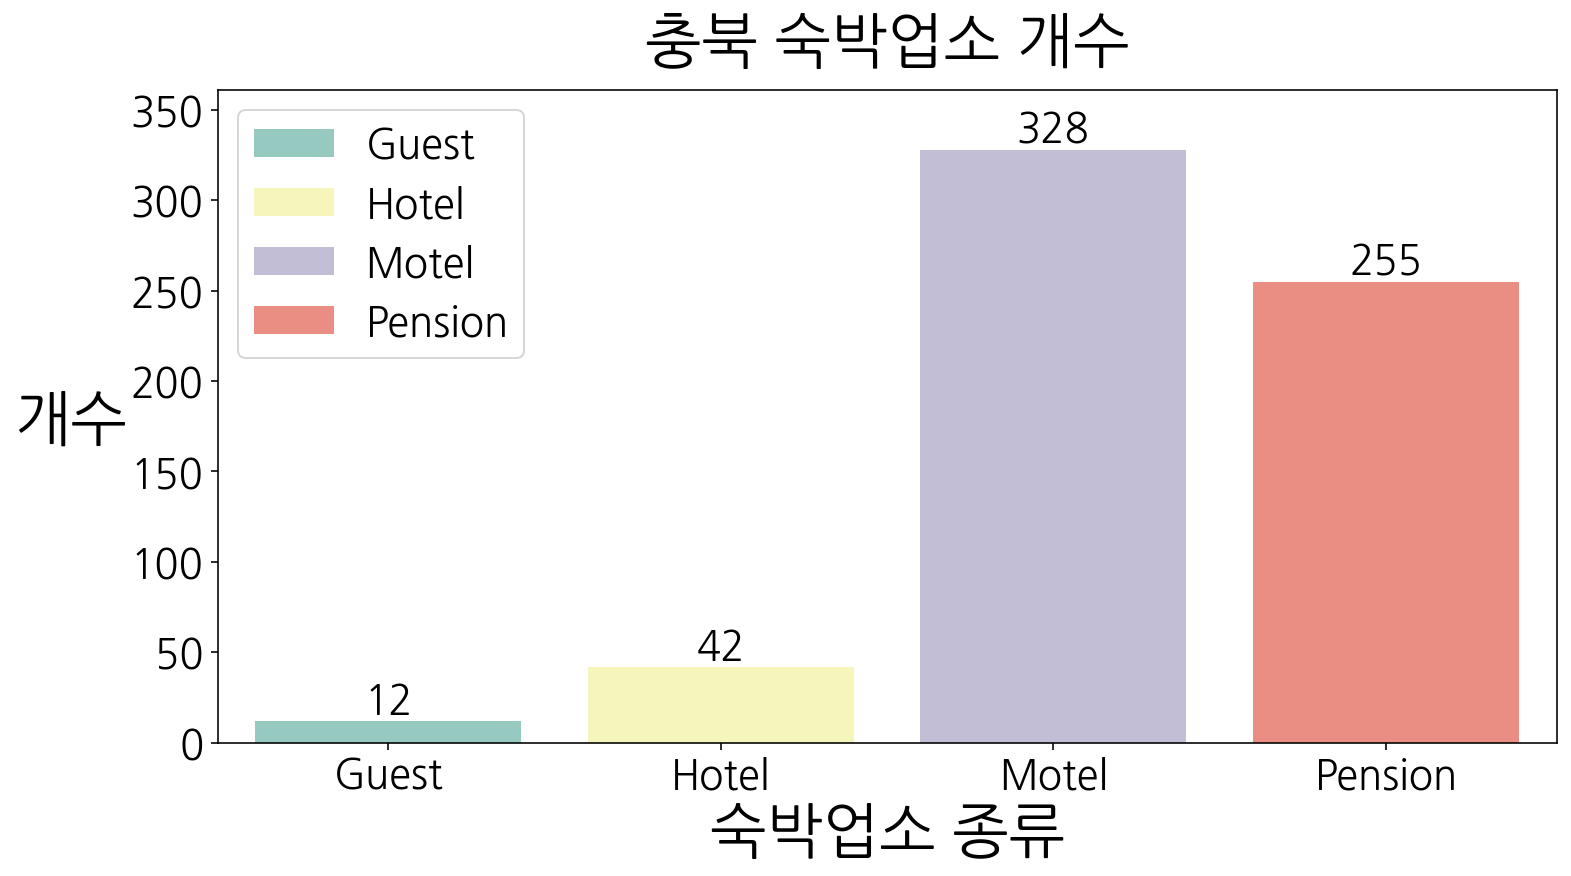

In [284]:
################### 충북 숙박업소 개수 그래프
ax = plt.figure(figsize=(12,6))
ax = sns.countplot(data = dfc1, x='category',hue = 'category',palette='Set3',dodge=False)
ax.set_title('충북 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('숙박업소 종류')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Guest','Hotel','Motel','Pension'])
ax.set_ylabel('개수',rotation=0,labelpad=30,position=(0,0.45,0))
plt.legend(labels=['Guest','Hotel','Motel','Pension'],fontsize=20)
plt.text(0,gtotal,gtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(1,htotal,htotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(2,mtotal,mtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(3,ptotal,ptotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.margins(0.03, 0.1)
#plt.show()
plt.savefig('충북 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

In [285]:
########### 지도 시각화용 dataset
df2=df.groupby(df['loc2']).mean()
df2.reset_index(level=['loc2'],inplace=True)
df_count=df.groupby('loc2').size()
df_count.reset_index(drop=True,inplace=True)
df2['count']=df_count
df2 = df2.sort_values(by='lowest_price',ascending=False)
df2.reset_index(drop=True,inplace=True)
df2['SIG_CD'] = df2['SIG_CD'].astype(str)

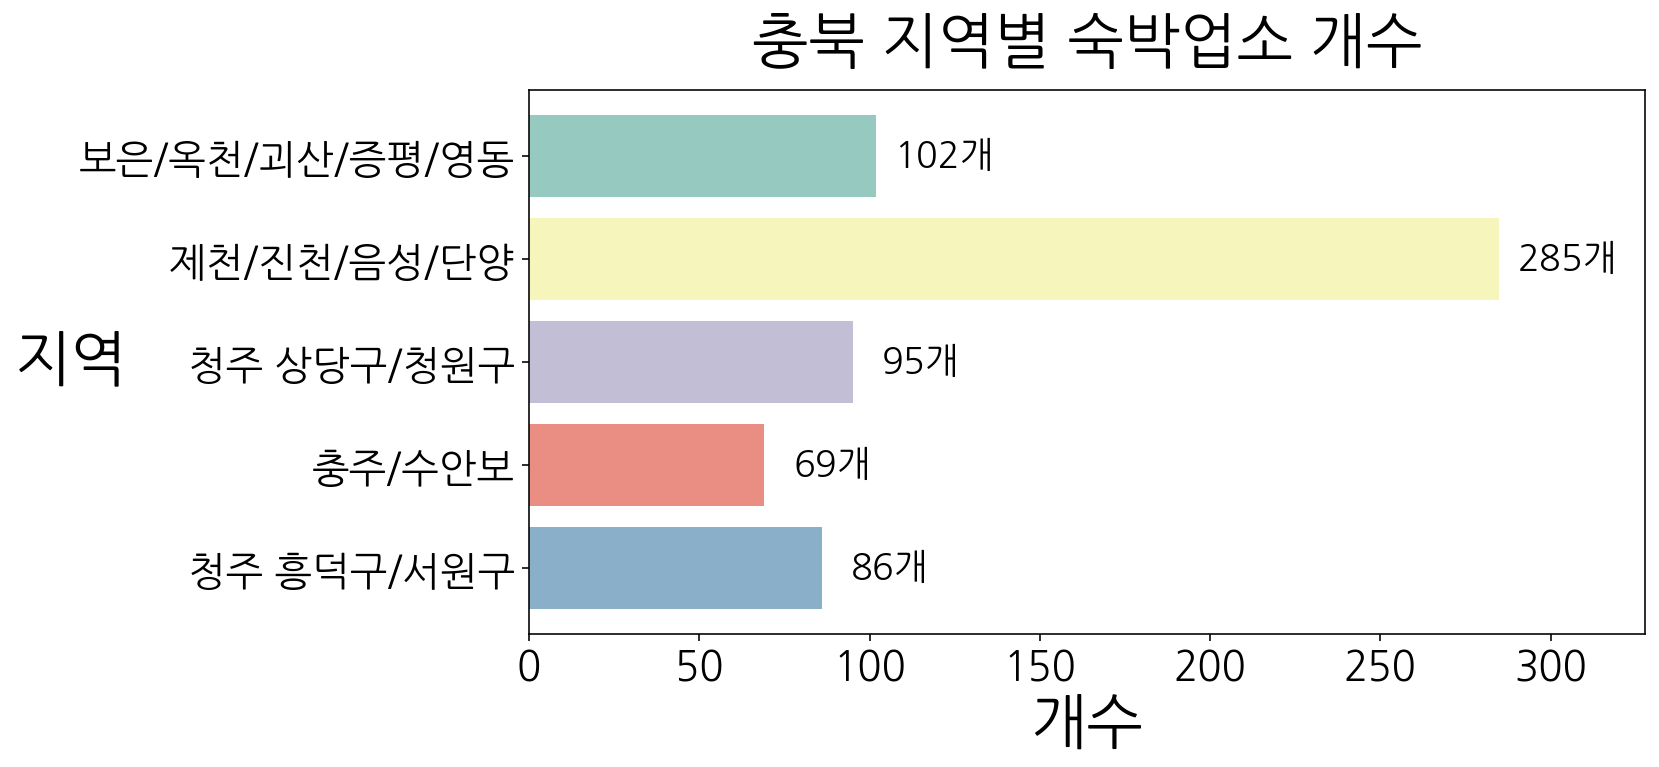

In [289]:
############## 충북 지역별 숙박업소 개수
ax = plt.figure(figsize=(10,5))
ax = sns.barplot(data = df2, x='count', y = 'loc2',palette='Set3')
ax.set_title('충북 지역별 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('개수')
ax.set_ylabel('지역',rotation=0,position=(0,0.45,0))
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_width())}개', (p.get_width()+20,p.get_y()-0.15), ha='center', va='top', color='black', size=18)
plt.margins(0.15,0.05)
#plt.show()
plt.savefig('충북 지역별 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

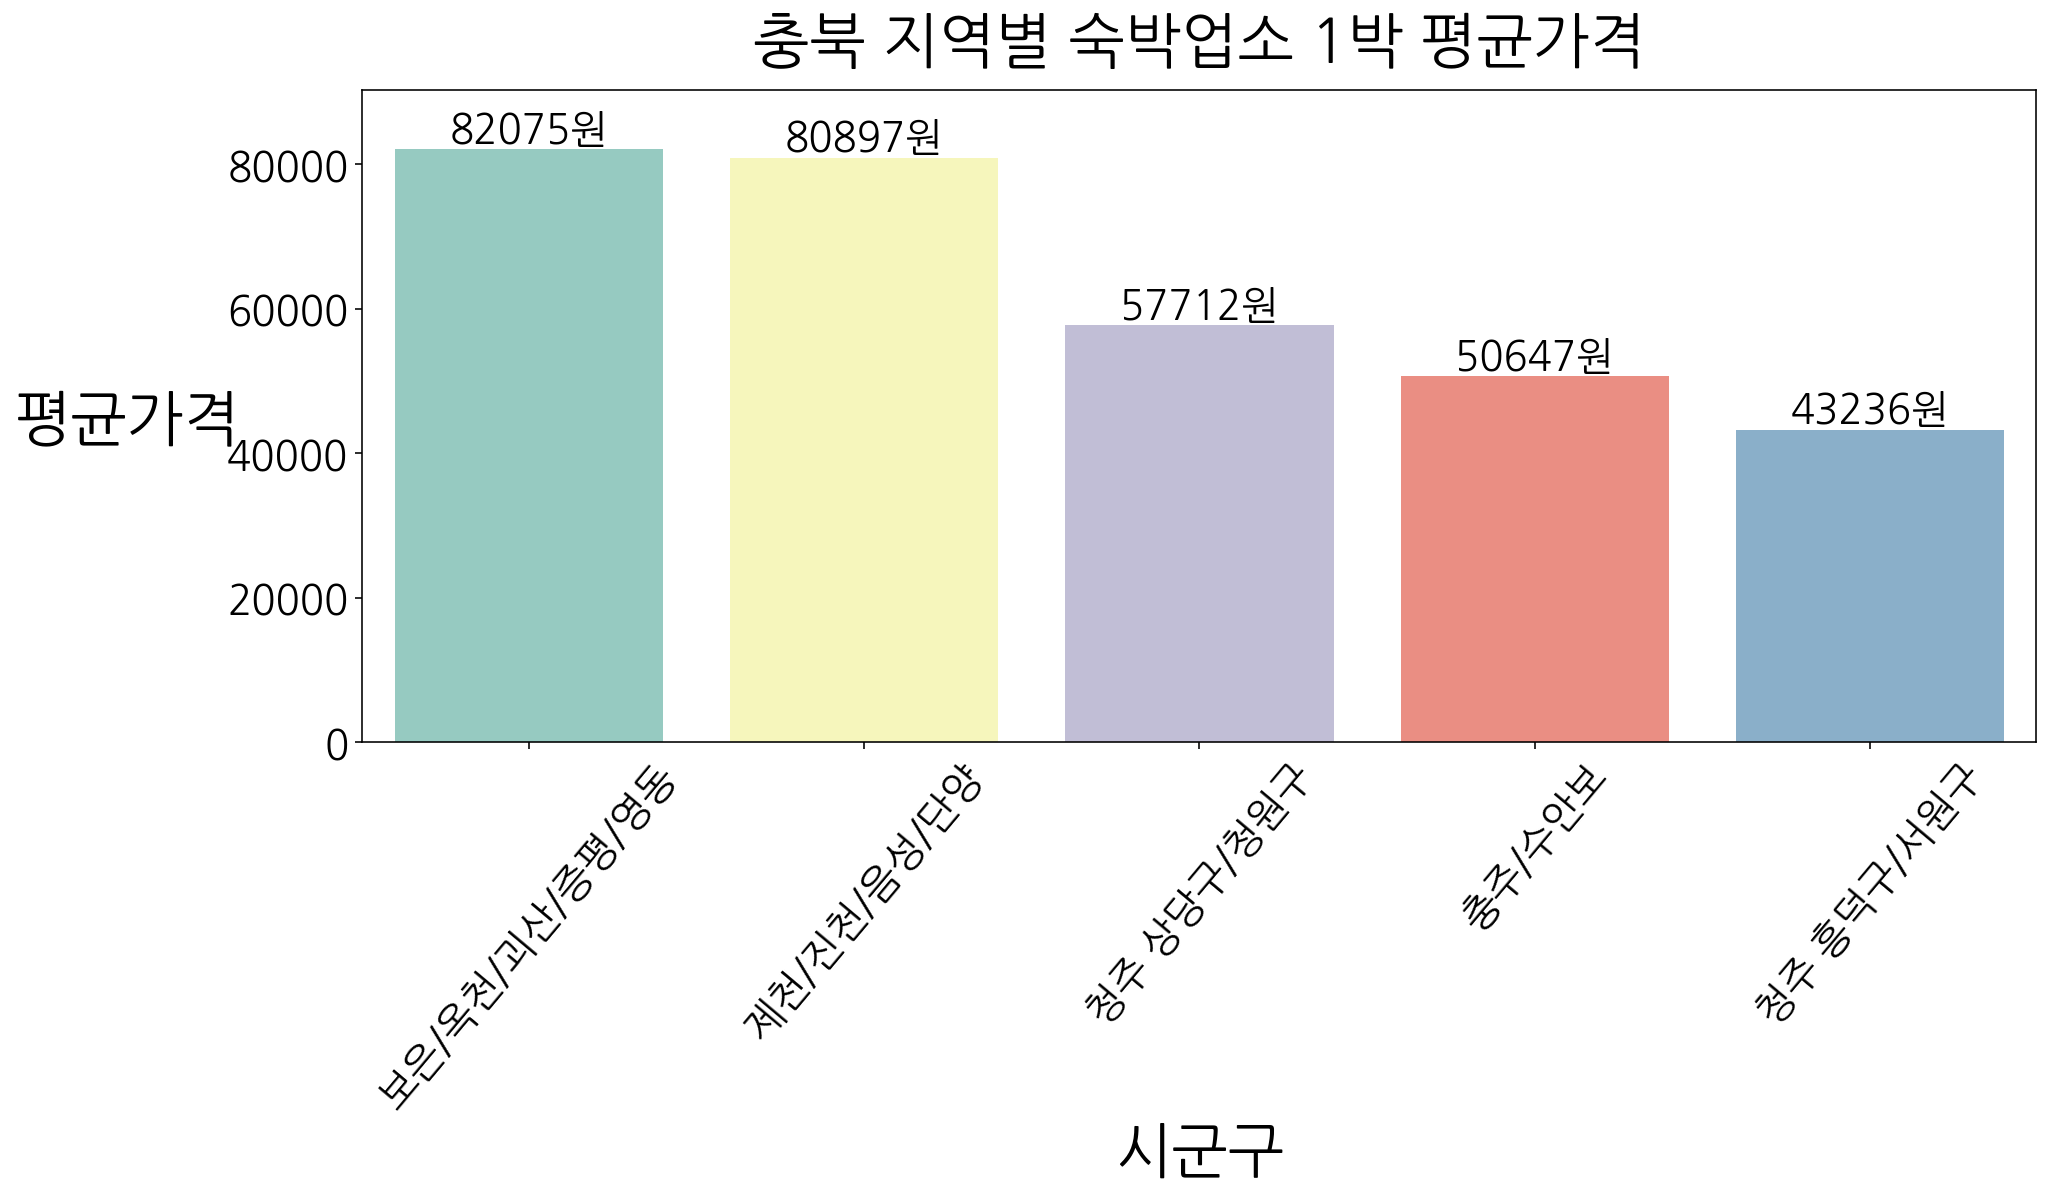

In [290]:
############## 충북 지역별 평균숙박업소 가격 그래프
########## 모든 업소의 최저가격을 가지고 추산한 것임으로 종합 가격 평균은 아님.
ax = plt.figure(figsize=(15,6))
ax = sns.barplot(data = df2, x='loc2', y = 'lowest_price',palette='Set3')
ax.set_title('충북 지역별 숙박업소 1박 평균가격',
            pad=15.0)
ax.set_xlabel('시군구')
ax.set_ylabel('평균가격',rotation=0,labelpad=50,position=(0,0.45,0))
for i in range(len(df2)):
    plt.text(i,round(df2.iloc[i][2]),str(round(df2.iloc[i][2]))+'원',fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.xticks(rotation=50)
plt.margins(0.02, 0.1)
#plt.show()
plt.savefig('충북 지역별 숙박업소 1박 평균가격.png',bbox_inches='tight', pad_inches=0.5) 

In [291]:
df2

,loc2,score,lowest_price,SIG_CD,count
0,보은/옥천/괴산/증평/영동,4.162745,82074.784314,43720,102
1,제천/진천/음성/단양,4.273684,80896.680702,43150,285
2,청주 상당구/청원구,4.340000,57711.642105,43111,95
3,충주/수안보,4.324638,50646.753623,43130,69
4,청주 흥덕구/서원구,4.473256,43235.848837,43112,86


In [297]:
m = folium.Map(location=[36.3, 127.0],zoom_start=8)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','lowest_price'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='평균 가격').add_to(m)
folium.Marker([36.319713468510784, 127.73110553045565],tooltip = df2['loc2'][0]+' : '+str(int(df2['lowest_price'][0]))+'원').add_to(m)
folium.Marker([37.093517298850536, 128.19898088970177],tooltip = df2['loc2'][1]+' : '+str(int(df2['lowest_price'][1]))+'원').add_to(m)
folium.Marker([36.923468550197555, 127.51008240267043],tooltip = df2['loc2'][1]+' : '+str(int(df2['lowest_price'][1]))+'원').add_to(m)
folium.Marker([36.65130247733922, 127.50739603830556],tooltip = df2['loc2'][2]+' : '+str(int(df2['lowest_price'][2]))+'원').add_to(m)
folium.Marker([37.01557366823939, 127.91624626927123],tooltip = df2['loc2'][3]+' : '+str(int(df2['lowest_price'][3]))+'원').add_to(m)
folium.Marker([36.63624152797094, 127.43203064770677],tooltip = df2['loc2'][4]+' : '+str(int(df2['lowest_price'][4]))+'원').add_to(m)
m

In [293]:
m.save('충북 숙밥업소 1박 평균가격.html')

In [298]:
#### 시군구별 숙박업소 개수
m = folium.Map(location=[36.3, 127.0],zoom_start=8)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','count'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='숙박업소 개수').add_to(m)
folium.Marker([36.319713468510784, 127.73110553045565],tooltip = df2['loc2'][0]+' : '+str(int(df2['count'][0]))+'개').add_to(m)
folium.Marker([37.093517298850536, 128.19898088970177],tooltip = df2['loc2'][1]+' : '+str(int(df2['count'][1]))+'개').add_to(m)
folium.Marker([36.923468550197555, 127.51008240267043],tooltip = df2['loc2'][1]+' : '+str(int(df2['lowest_price'][1]))+'원').add_to(m)
folium.Marker([36.65130247733922, 127.50739603830556],tooltip = df2['loc2'][2]+' : '+str(int(df2['count'][2]))+'개').add_to(m)
folium.Marker([37.01557366823939, 127.91624626927123],tooltip = df2['loc2'][3]+' : '+str(int(df2['count'][3]))+'개').add_to(m)
folium.Marker([36.63624152797094, 127.43203064770677],tooltip = df2['loc2'][4]+' : '+str(int(df2['count'][4]))+'개').add_to(m)

m
### 색상 https://dailyheumsi.tistory.com/m/144?category=854906

In [299]:
m.save('충북 숙밥업소 수.html')